In [2]:
import os
import tensorflow as tf



In [5]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'false'
tf.config.set_visible_devices([], 'GPU')

# Create a configuration object to force CPU usage
cpu_config = tf.compat.v1.ConfigProto(device_count={'GPU': 0})
sess = tf.compat.v1.Session(config=cpu_config)

# Set this session as the default session
tf.compat.v1.keras.backend.set_session(sess)

# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#     except RuntimeError as e:
#         print(e)
        
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("Num CPUs Available: ", len(tf.config.experimental.list_physical_devices('CPU')))


# List all physical devices
tf.config.experimental.list_physical_devices()


TensorFlow version: 2.12.0
Num GPUs Available:  1
Num CPUs Available:  1


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:

# Set environment variable to disable GPU visibility
os.environ['CUDA_VISIBLE_DEVICES'] = ''

# Disable all GPUs
tf.config.set_visible_devices([], 'GPU')

# Check the available devices to ensure no GPU is being used
gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(gpus))
print("Num CPUs Available: ", len(cpus))

# Example of a simple operation to confirm it runs on CPU
with tf.device('/CPU:0'):
    a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
    b = tf.constant([[1.0, 1.0], [0.0, 1.0]])
    c = tf.matmul(a, b)
    print("Result of matrix multiplication:", c.numpy())

# List all physical devices
print("All physical devices:", tf.config.experimental.list_physical_devices())

TensorFlow version: 2.12.0
Num GPUs Available:  1
Num CPUs Available:  1
Result of matrix multiplication: [[1. 3.]
 [3. 7.]]
All physical devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
def build_xor_model(hidden_layer_sizes = [], learning_rate = 1.):
    # create base model
    model = tf.keras.Sequential()
    
    # add hidden layers with given sizes
    for hidden_layer_size in hidden_layer_sizes:
        # tanh is the same as sigmoid, except it has a range of (-1 to 1) instead of (0 to 1)
        model.add(tf.keras.layers.Dense(units=hidden_layer_size, activation='tanh'))
    
    # add a final dense layer with width = 1 as output (sigmoid like logistic regression)
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', 
                  optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate))
    
    return model

In [7]:
# define data
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([0,1,1,0]).reshape(-1, 1)  # Reshape Y to be (4, 1)
Y.shape

(4, 1)

Epoch 1/100
1/1 [==============================] - 0s 155ms/step - loss: 0.7714
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 0.7354
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 0.7134
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 0.6986
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 0.6879
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 0.6796
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.6731
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.6676
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 0.6629
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 0.6586
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 0.6546
Epoch 12/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6507
Epoch 13/100
1/1 [==============================] - 0s 9ms

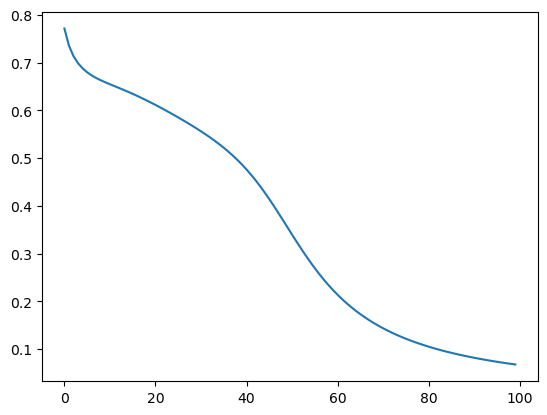

In [8]:
# create model with one hidden layer
xor_model = build_xor_model(hidden_layer_sizes = [2])

history = xor_model.fit(x=X, y=Y, epochs=100, batch_size = 4)

losses = history.history['loss']
losses
plt.plot(losses)

In [9]:
print(f"{Y = }")
print(f"{X = }")

xor_model.predict(X)

Y = array([[0],
       [1],
       [1],
       [0]])
X = array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])
1/1 [==============================] - 0s 50ms/step


array([[0.05085257],
       [0.9143125 ],
       [0.9218256 ],
       [0.04227959]], dtype=float32)

In [1]:
import tensorflow as tf
import time
import numpy as np

# Define a function to measure execution time
def measure_time(device, task_func, *args):
    start_time = time.time()
    with tf.device(device):
        task_func(*args)
    end_time = time.time()
    return end_time - start_time

2024-06-10 16:48:15.116636: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Define a computational task
def matrix_multiplication(size):
    a = tf.random.uniform((size, size))
    b = tf.random.uniform((size, size))
    c = tf.matmul(a, b)
    return c


# Matrix size for the test
matrix_size = 5000

# Measure time with GPU
gpu_time = measure_time('/GPU:0', matrix_multiplication, matrix_size)
print(f"Time taken with GPU: {gpu_time:.4f} seconds")

# Measure time with CPU
cpu_time = measure_time('/CPU:0', matrix_multiplication, matrix_size)
print(f"Time taken with CPU: {cpu_time:.4f} seconds")

Time taken with GPU: 0.0962 seconds
Time taken with CPU: 0.9651 seconds


In [4]:
def compile_fit_model():
    # Define the XOR input and output
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])

    # Define the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(2, input_dim=2, activation='relu'),  # hidden layer with 2 neurons
        tf.keras.layers.Dense(2, activation='sigmoid'),  # output layer with 1 neuron
        tf.keras.layers.Dense(2, activation='sigmoid'),  # output layer with 1 neuron
        tf.keras.layers.Dense(1, activation='sigmoid')  # output layer with 1 neuron
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X, y, epochs=10, verbose=0)
    return history


# Measure time with GPU
gpu_time = measure_time('/GPU:0', compile_fit_model)
print(f"Time taken with GPU: {gpu_time:.4f} seconds")

# Measure time with CPU
cpu_time = measure_time('/CPU:0', compile_fit_model)
print(f"Time taken with CPU: {cpu_time:.4f} seconds")


2024-06-10 16:48:24.742259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-06-10 16:48:24.788223: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


Time taken with GPU: 1.2259 seconds
Time taken with CPU: 0.3849 seconds


In [31]:
def compile_fit_large_model():

    # Generate a larger dataset
    X = np.random.rand(10000, 20)
    y = np.random.randint(2, size=(10000, 1))

    # Define a larger model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, input_dim=20, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X, y, epochs=10, verbose=1)
    return history

# Measure time with GPU
gpu_time = measure_time('/GPU:0', compile_fit_large_model)
print(f"Time taken with GPU: {gpu_time:.4f} seconds")

# Measure time with CPU
cpu_time = measure_time('/CPU:0', compile_fit_large_model)
print(f"Time taken with CPU: {cpu_time:.4f} seconds")

Physical devices cannot be modified after being initialized
Epoch 1/10


2024-06-10 10:05:30.867649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-06-10 10:05:30.912677: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


313/313 [==============================] - 4s 10ms/step - loss: 0.6997 - accuracy: 0.5016
Epoch 2/10
313/313 [==============================] - 3s 9ms/step - loss: 0.6962 - accuracy: 0.4997
Epoch 3/10
313/313 [==============================] - 3s 9ms/step - loss: 0.6964 - accuracy: 0.5095
Epoch 4/10
313/313 [==============================] - 3s 8ms/step - loss: 0.6954 - accuracy: 0.5060
Epoch 5/10
313/313 [==============================] - 3s 8ms/step - loss: 0.6956 - accuracy: 0.5015
Epoch 6/10
313/313 [==============================] - 3s 9ms/step - loss: 0.6968 - accuracy: 0.5072
Epoch 7/10
313/313 [==============================] - 3s 9ms/step - loss: 0.6953 - accuracy: 0.5010
Epoch 8/10
313/313 [==============================] - 3s 9ms/step - loss: 0.6984 - accuracy: 0.4983
Epoch 9/10
313/313 [==============================] - 3s 9ms/step - loss: 0.6974 - accuracy: 0.5013
Epoch 10/10
313/313 [==============================] - 3s 9ms/step - loss: 0.6975 - accuracy: 0.4964
Time take

In [3]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("Num CPUs Available: ", len(tf.config.experimental.list_physical_devices('CPU')))


TensorFlow version: 2.12.0
Num GPUs Available:  1
Num CPUs Available:  1


In [7]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


Physical devices cannot be modified after being initialized


____
## Train 

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import numpy as np
import time

# Enable memory growth for GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

# Define the model
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dense(10, activation='softmax')
# ])
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Function to measure time and train the model
def measure_time_and_train(device, model, train_images, train_labels, epochs=5):
    start_time = time.time()
    with tf.device(device):
        history = model.fit(train_images, train_labels, epochs=epochs, validation_split=0.1, verbose=1)
    end_time = time.time()
    training_time = end_time - start_time
    return history, training_time

# Measure time and train the model on GPU
gpu_history, gpu_time = measure_time_and_train('/GPU:0', model, train_images, train_labels)
print(f"Time taken with GPU: {gpu_time:.4f} seconds")


# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")


2024-06-10 10:20:29.736659: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-10 10:20:31.820384: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-10 10:20:31.820430: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/5


2024-06-10 10:20:32.477271: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-06-10 10:20:32.531123: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


1688/1688 [==============================] - ETA: 0s - loss: 0.7720 - accuracy: 0.7428

2024-06-10 10:20:56.687944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - 25s 14ms/step - loss: 0.7720 - accuracy: 0.7428 - val_loss: 0.5199 - val_accuracy: 0.8238
Epoch 2/5
1688/1688 [==============================] - 24s 14ms/step - loss: 0.7824 - accuracy: 0.8017 - val_loss: 0.5063 - val_accuracy: 0.8560
Epoch 3/5
1688/1688 [==============================] - 24s 14ms/step - loss: 1.6015 - accuracy: 0.7931 - val_loss: 1.8891 - val_accuracy: 0.8002
Epoch 4/5
1688/1688 [==============================] - 24s 14ms/step - loss: 5.0369 - accuracy: 0.7834 - val_loss: 4.2096 - val_accuracy: 0.8323
Epoch 5/5
1688/1688 [==============================] - 24s 14ms/step - loss: 12.6297 - accuracy: 0.7877 - val_loss: 7.1560 - val_accuracy: 0.8597
Time taken with GPU: 121.4475 seconds
313/313 - 1s - loss: 7.7774 - accuracy: 0.8553 - 1s/epoch - 4ms/step
Test accuracy: 0.8553


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import numpy as np
import time

# Set TensorFlow to use only the CPU
tf.config.set_visible_devices([], 'GPU')

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

# Define the model
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dense(10, activation='softmax')
# ])

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Function to measure time and train the model
def measure_time_and_train(device, model, train_images, train_labels, epochs=5):
    start_time = time.time()
    with tf.device(device):
        history = model.fit(train_images, train_labels, epochs=epochs, validation_split=0.1, verbose=1)
    end_time = time.time()
    training_time = end_time - start_time
    return history, training_time

# Measure time and train the model on CPU
cpu_history, cpu_time = measure_time_and_train('/CPU:0', model, train_images, train_labels)
print(f"Time taken with CPU: {cpu_time:.4f} seconds")

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")


Epoch 1/5
1688/1688 [==============================] - 25s 14ms/step - loss: 0.6441 - accuracy: 0.7654 - val_loss: 0.3691 - val_accuracy: 0.8612
Epoch 2/5
1688/1688 [==============================] - 24s 14ms/step - loss: 0.4071 - accuracy: 0.8550 - val_loss: 0.3142 - val_accuracy: 0.8825
Epoch 3/5
1688/1688 [==============================] - 24s 14ms/step - loss: 0.3600 - accuracy: 0.8717 - val_loss: 0.2906 - val_accuracy: 0.8897
Epoch 4/5
1688/1688 [==============================] - 23s 14ms/step - loss: 0.3356 - accuracy: 0.8826 - val_loss: 0.2811 - val_accuracy: 0.8953
Epoch 5/5
1688/1688 [==============================] - 23s 14ms/step - loss: 0.3122 - accuracy: 0.8877 - val_loss: 0.2593 - val_accuracy: 0.9058
Time taken with CPU: 118.8660 seconds
313/313 - 1s - loss: 0.2822 - accuracy: 0.8978 - 1s/epoch - 4ms/step
Test accuracy: 0.8978


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import numpy as np
import time

# Set TensorFlow to use only the CPU
tf.config.set_visible_devices([], 'GPU')

print("Devices available: ", tf.config.list_physical_devices('GPU'))


Devices available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
